# Data Set

Contributors looked at a single sentence and rated its emotional content based on Plutchik's wheel of emotions. 18 emotional choices were presented to contributors for grading. Some researchers may find the full report, with non-aggregated responses, to be of interest. The agg report can be downloaded with the button to the right, while the full report can be downloaded by clicking this link.

## Pluchik's Model

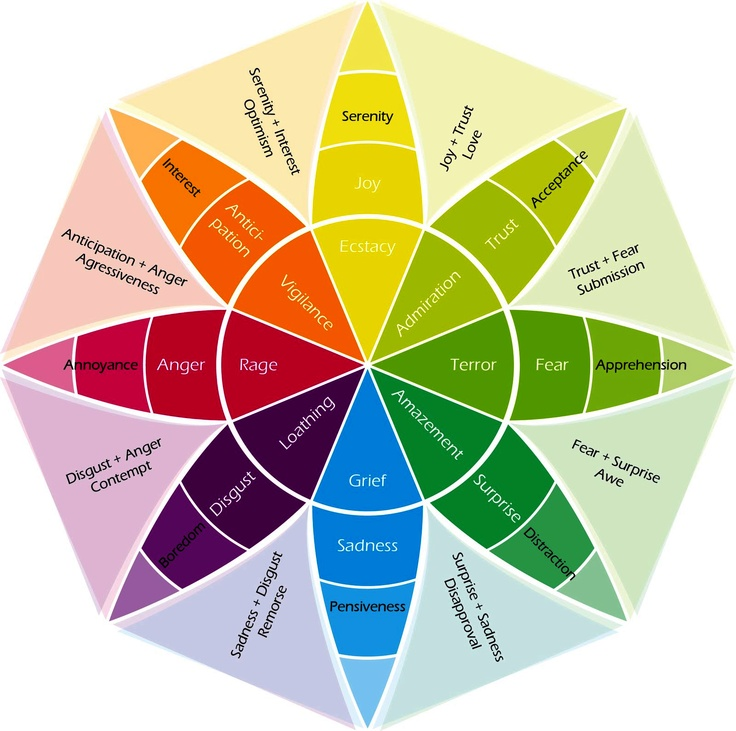

Psychologist Robert Plutchik created the Plutchik Model shown above. It shows there are 8 basic emotions: joy, trust, fear, surprise, sadness, anticipation, anger, and disgust. Plutchik’s wheel of emotions organizes these 8 basic emotions based on the physiological purpose of each. The model is actually the little “ice cream cone” which unfolds to the emotions wheel.,

As you’ll see below, this framework helps bring clarity to emotions, which can sometimes feel mysterious and overwhelming. To improve your understanding of emotions, Plutchik’s wheel of emotions is a great place to start –  and we included an interpretation guide below!

So, what do all those colors and petals mean?

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7) #increase figure size

import seaborn as sns
sns.set(style='white', font_scale=2) #set style

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import uniform, norm, bernoulli, poisson

## The Data

In [ ]:
df = pd.read_csv('./primary_plutchik_wheel_dfe.csv')
df.set_index('id')

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,emotion,emotion_confidence,emotion_gold,idiom_id,sentence
id,,,,,,,,,,
1,731671736,False,finalized,5,2015-06-08T16:10:00,Neutral,0.3333,NaN,1,How much of the forecast was genuine and how m...
2,731671737,False,finalized,5,2015-06-12T14:33:00,Neutral,0.3885,NaN,2,I did touch them one time you see but of cours...
3,731671738,False,finalized,5,2015-06-08T16:10:00,Neutral,0.3333,NaN,3,We find that choice theorists admit that they ...
4,731671739,False,finalized,5,2015-06-08T16:30:00,Neutral,0.3690,NaN,4,"Well, here I am with an olive branch."
5,731671740,False,finalized,5,2015-06-08T16:30:00,Neutral,0.5572,NaN,5,"Its rudder and fin were both knocked out, and ..."
...,...,...,...,...,...,...,...,...,...,...
5978,731674255,False,finalized,5,2015-06-10T21:20:00,Neutral,0.4450,NaN,44,By this point some of my readers will be up in...
5980,731674256,False,finalized,5,2015-06-10T23:36:00,Neutral,0.7879,NaN,597,Members of that nobility had been prominent in...
379,733581007,False,finalized,5,2015-06-09T14:23:00,Fear,0.4409,NaN,379,He did his best to paper over the cracks.


# Exploring the DATA

In [ ]:
df.set_index('id')
df.head(100)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,emotion,emotion_confidence,emotion_gold,id,idiom_id,sentence
0,731671736,False,finalized,5,2015-06-08T16:10:00,Neutral,0.3333,NaN,1,1,How much of the forecast was genuine and how m...
1,731671737,False,finalized,5,2015-06-12T14:33:00,Neutral,0.3885,NaN,2,2,I did touch them one time you see but of cours...
2,731671738,False,finalized,5,2015-06-08T16:10:00,Neutral,0.3333,NaN,3,3,We find that choice theorists admit that they ...
3,731671739,False,finalized,5,2015-06-08T16:30:00,Neutral,0.3690,NaN,4,4,"Well, here I am with an olive branch."
4,731671740,False,finalized,5,2015-06-08T16:30:00,Neutral,0.5572,NaN,5,5,"Its rudder and fin were both knocked out, and ..."
...,...,...,...,...,...,...,...,...,...,...,...
95,731671831,False,finalized,5,2015-06-12T14:23:00,Surprise,0.4317,NaN,145,145,"Ants in your pants, darling?"
96,731671832,False,finalized,5,2015-06-12T14:27:00,Neutral,0.5833,NaN,148,148,Once it was known that Terry Gill was wanted f...
97,731671833,False,finalized,5,2015-06-12T14:23:00,Disgust,0.2158,NaN,149,149,Cause a stir if nothing else wouldn't it?
98,731671834,False,finalized,5,2015-06-08T15:47:00,Disapproval,0.2143,NaN,151,151,Fred Klepner had been in and out of both Mark'...


In [ ]:
df.dtypes


unit_id                 int64
golden                   bool
unit_state             object
trusted_judgments       int64
last_judgment_at       object
emotion                object
emotion_confidence    float64
emotion_gold           object
id                      int64
idiom_id                int64
sentence               object
dtype: object

In [ ]:
# determine rows and columns in df
df.shape

(2524, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_id,2524.0,7.316753e+08,65777.408127,7.316717e+08,7.316724e+08,7.316730e+08,7.316736e+08,733582393.0
trusted_judgments,2524.0,5.478209e+00,2.291119,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,28.0
emotion_confidence,2524.0,4.892523e-01,0.192135,1.521000e-01,3.870250e-01,4.211000e-01,6.007500e-01,1.0
id,2524.0,2.287273e+03,1599.394870,1.000000e+00,9.347500e+02,2.037500e+03,3.457000e+03,5980.0
idiom_id,2524.0,3.117540e+02,178.057696,1.000000e+00,1.630000e+02,3.340000e+02,4.630000e+02,599.0


In [ ]:
df.describe(include=object).T

,count,unique,top,freq
unit_state,2524,2,finalized,2470
last_judgment_at,2500,294,2015-06-09T14:10:00,20
emotion,2524,18,Neutral,534
emotion_gold,54,47,Aggression\nAnger\nContempt\nDisapproval\nDisg...,5
sentence,2524,2490,By this point some of my readers will be up in...,2


In [ ]:
df2 = df[df.duplicated()]
df2

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,emotion,emotion_confidence,emotion_gold,id,idiom_id,sentence


In [ ]:
# df2 = df[df.duplicated('sentence')]
# df2
# # df2.count()

In [ ]:
# True if row contains at least one null value
# axis argument: 0 for reducing by ‘index’, 1 for reducing by ‘columns’,
null_rows = df.isnull().any(axis=1)
df[null_rows].shape

(2494, 11)

In [ ]:
# df[null_rows]

In [ ]:
df.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at', 'emotion', 'emotion_confidence', 'emotion_gold',
       'id', 'idiom_id', 'sentence'],
      dtype='object')

In [ ]:
df.drop(['unit_id','idiom_id'], axis=1)

,golden,unit_state,trusted_judgments,last_judgment_at,emotion,emotion_confidence,emotion_gold,id,sentence
0,False,finalized,5,2015-06-08T16:10:00,Neutral,0.3333,NaN,1,How much of the forecast was genuine and how m...
1,False,finalized,5,2015-06-12T14:33:00,Neutral,0.3885,NaN,2,I did touch them one time you see but of cours...
2,False,finalized,5,2015-06-08T16:10:00,Neutral,0.3333,NaN,3,We find that choice theorists admit that they ...
3,False,finalized,5,2015-06-08T16:30:00,Neutral,0.3690,NaN,4,"Well, here I am with an olive branch."
4,False,finalized,5,2015-06-08T16:30:00,Neutral,0.5572,NaN,5,"Its rudder and fin were both knocked out, and ..."
...,...,...,...,...,...,...,...,...,...
2519,False,finalized,5,2015-06-10T21:20:00,Neutral,0.4450,NaN,5978,By this point some of my readers will be up in...
2520,False,finalized,5,2015-06-10T23:36:00,Neutral,0.7879,NaN,5980,Members of that nobility had been prominent in...
2521,False,finalized,5,2015-06-09T14:23:00,Fear,0.4409,NaN,379,He did his best to paper over the cracks.
2522,False,finalized,5,2015-06-10T03:06:00,Disapproval,0.3713,NaN,986,Heavy dependence on sponsorship and arts counc...


In [ ]:
df.trusted_judgments.value_counts()

5     2227
6      144
7       65
9       18
8       16
19      11
17       5
22       5
18       5
21       5
16       4
23       3
20       3
27       3
24       2
28       2
26       2
15       1
13       1
12       1
14       1
Name: trusted_judgments, dtype: int64

In [ ]:
# np.iinfo(np.int8)
df[['id',"trusted_judgments"]].info(memory_usage="deep")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 2524 non-null   int64
 1   trusted_judgments  2524 non-null   int64
dtypes: int64(2)
memory usage: 39.6 KB


In [ ]:
(
df[["id", "trusted_judgments"]]
.assign(
id=df.id.astype(np.int16),
trusted_judgments=df.trusted_judgments.astype(np.int8),
)
.info(memory_usage="deep")
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 2524 non-null   int16
 1   trusted_judgments  2524 non-null   int8 
dtypes: int16(1), int8(1)
memory usage: 7.5 KB


# Visualisation

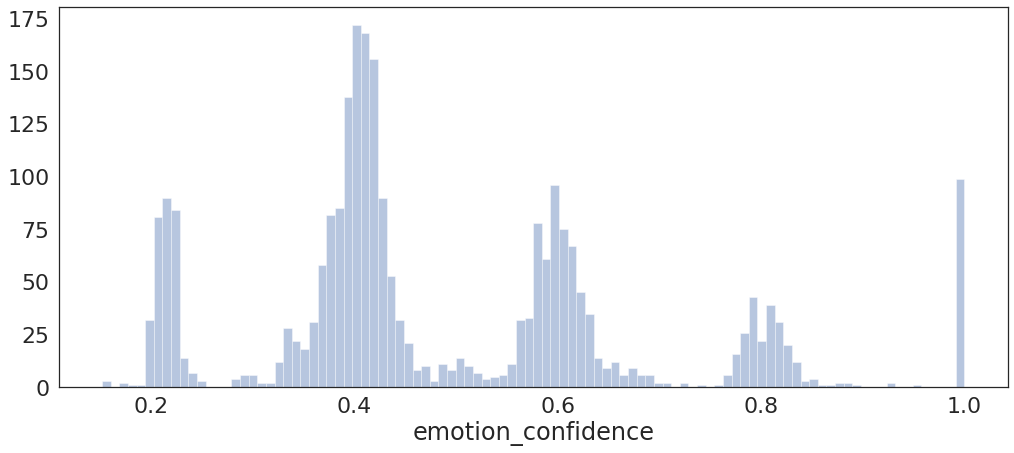

In [ ]:
# appears somewhat normal
# with some deviation from Normality
sns.distplot(df['emotion_confidence'], kde=False, bins=100);


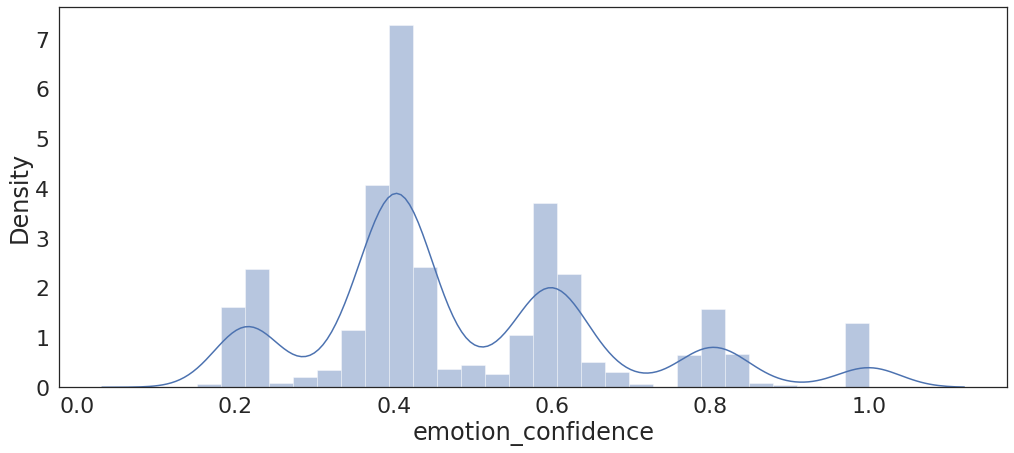

In [ ]:
# REM sleep is skewed
# inflation toward lower rem sleep times
# sns.distplot(df['sleep_rem'], kde=False, bins=10);
sns.distplot(df['emotion_confidence']);

As Seen this is Skewed to the left.

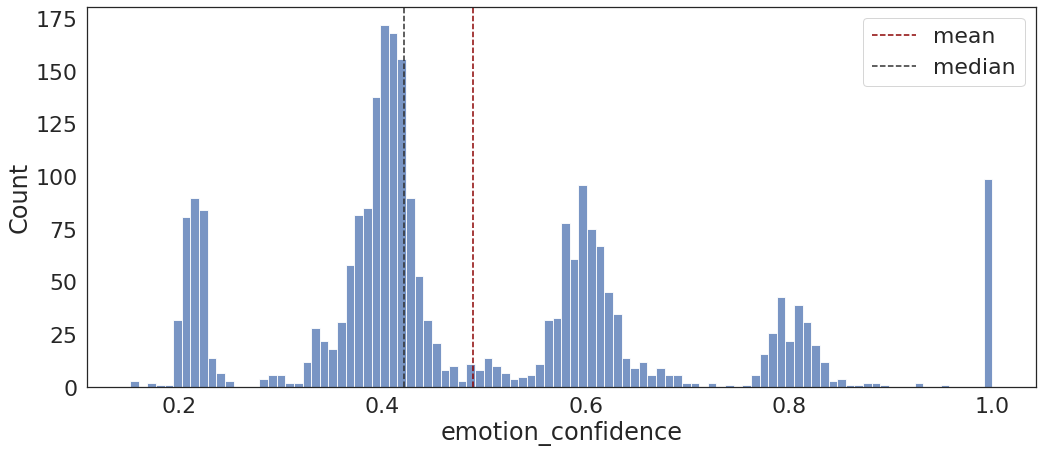

In [ ]:
# take a look at it all together
ax = sns.histplot(df['emotion_confidence'], bins=100);
ax.axvline(df['emotion_confidence'].mean(), color='darkred', linestyle='--', label='mean');
ax.axvline(df['emotion_confidence'].median(), color='#2e2e2e', linestyle='--', label='median')
ax.legend();

In [ ]:
df.emotion_confidence.describe()

count    2524.000000
mean        0.489252
std         0.192135
min         0.152100
25%         0.387025
50%         0.421100
75%         0.600750
max         1.000000
Name: emotion_confidence, dtype: float64

In [ ]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(df['emotion_confidence'], [25, 75])
lower, upper
# calculate IQR
iqr = upper - lower
iqr

0.213725

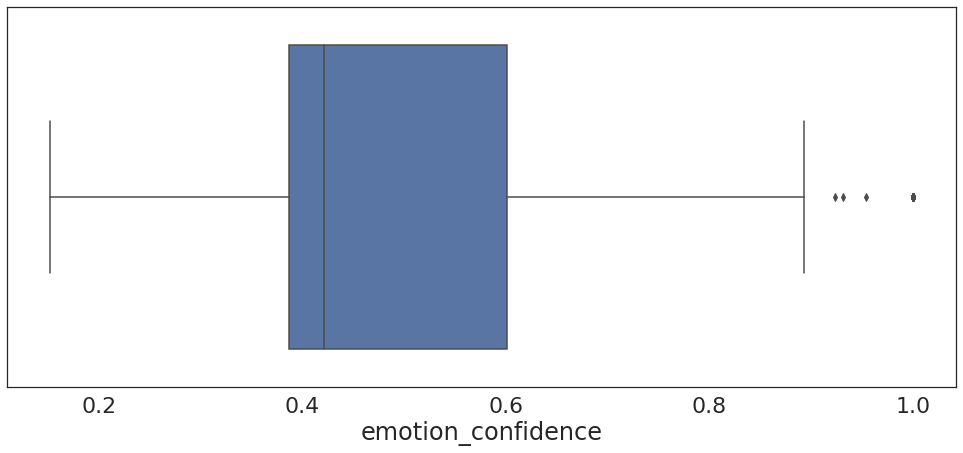

In [ ]:
# visualizing IQR
sns.boxplot(x='emotion_confidence', data=df);

In [ ]:
df.emotion.describe()

count        2524
unique         18
top       Neutral
freq          534
Name: emotion, dtype: object

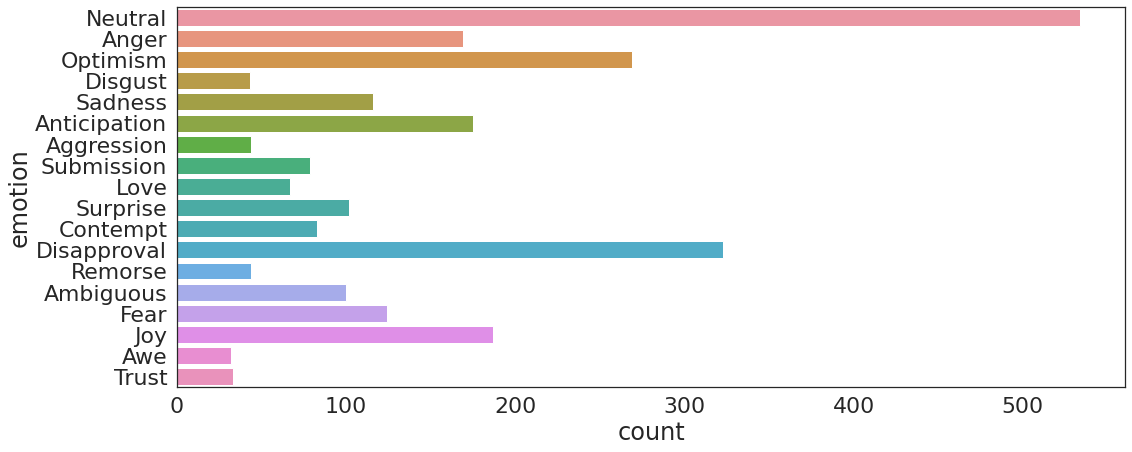

In [ ]:

top_n = df.emotion.value_counts().index[:18]
sns.countplot(y="emotion",data=(df.assign(emotion=df.emotion.where(df.emotion.isin(top_n), "Other"))),)


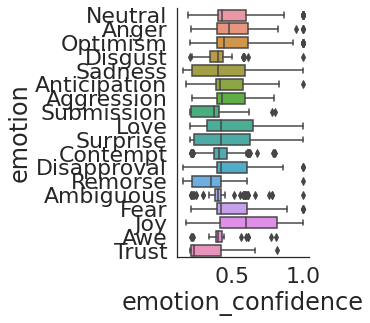

In [ ]:
sns.catplot(y="emotion", x="emotion_confidence", data=df, kind="box")


In [ ]:

# top_n = df.emotion_gold.value_counts().index[:5]
# sns.countplot(y="emotion_gold",data=(df.assign(emotion_gold=df.emotion_gold.where(df.emotion_gold.isin(top_n), "Other"))),)

No meaningful insight could be gathered form the rest.

# Outliers

In [ ]:
df.golden.describe()

count      2524
unique        2
top       False
freq       2470
Name: golden, dtype: object

In [ ]:
df.emotion_gold.describe()

count                                                    54
unique                                                   47
top       Aggression\nAnger\nContempt\nDisapproval\nDisg...
freq                                                      5
Name: emotion_gold, dtype: object

If we want, we can consider golden to be an outlier. It will effect meaning of emotion_gold column.